In [1]:
import sys
import os

current_dir = os.path.dirname(os.path.abspath('__file__')) 

parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from utils import get_dummies_and_sift
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("../2. Train Test Split/training_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16251 entries, 0 to 16250
Columns: 1397 entries, participant_id to test_value_Plasma_X-ray repair cross-complementing protein 6_RFU
dtypes: float64(1385), int64(2), object(10)
memory usage: 173.2+ MB


# Bivariate analysis 

We take a look at the relations of caffeine usage, demographic information, family history, DaTscan and DTI information with updrs scores (`updrs_1,updrs_2,updrs_3`), as well as the general trend of updrs scores progressions.

In [4]:
data["caff_drinks_current_use"].value_counts()

caff_drinks_current_use
Yes    3531
No      866
Name: count, dtype: int64

In [5]:
data["caff_drinks_ever_used_regularly"].value_counts()

caff_drinks_ever_used_regularly
Yes    4124
No      273
Name: count, dtype: int64

#### Observations:

The distribution of participants in terms of `caff_drinks_current_use` and `caff_drinks_ever_used_regularly` are very uneven.

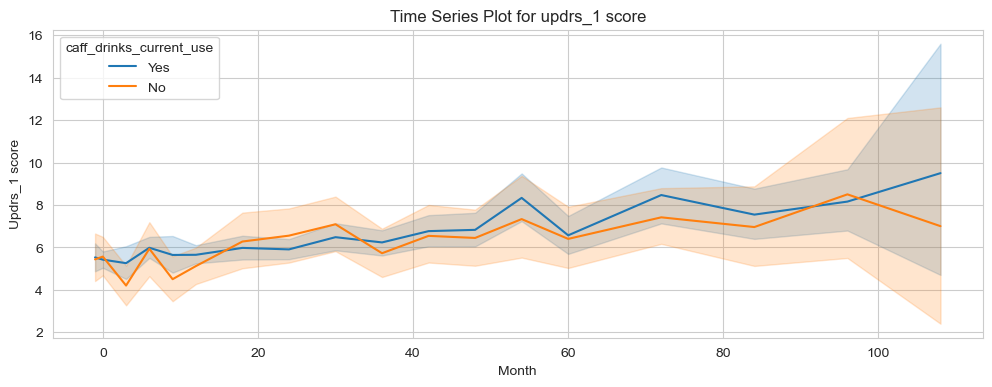

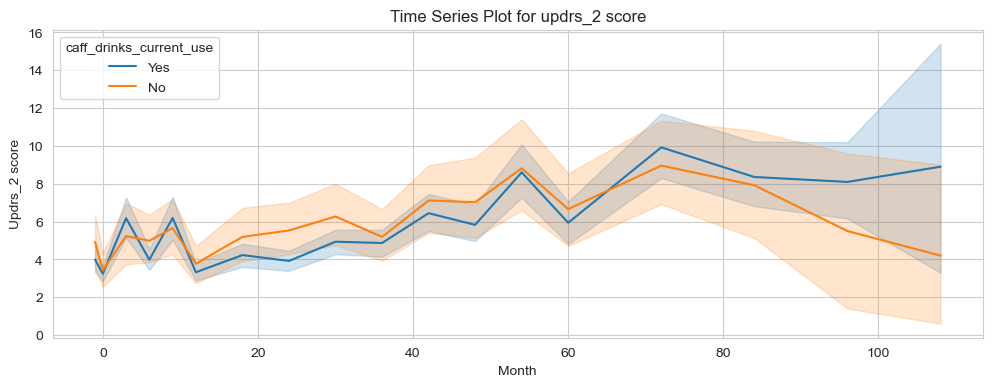

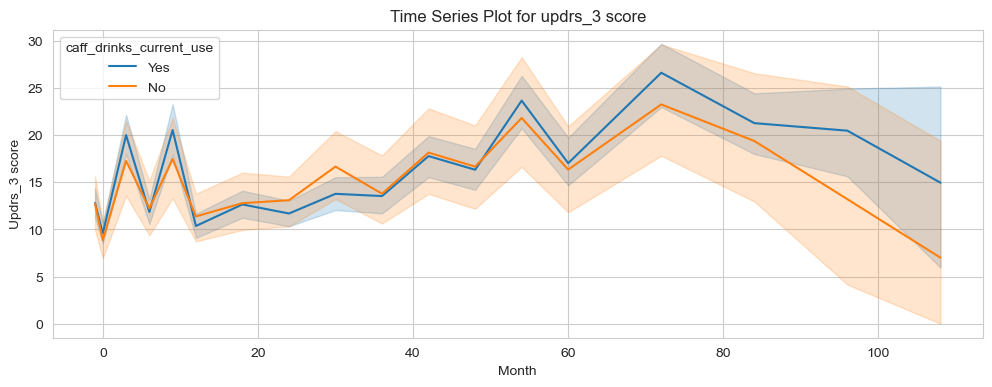

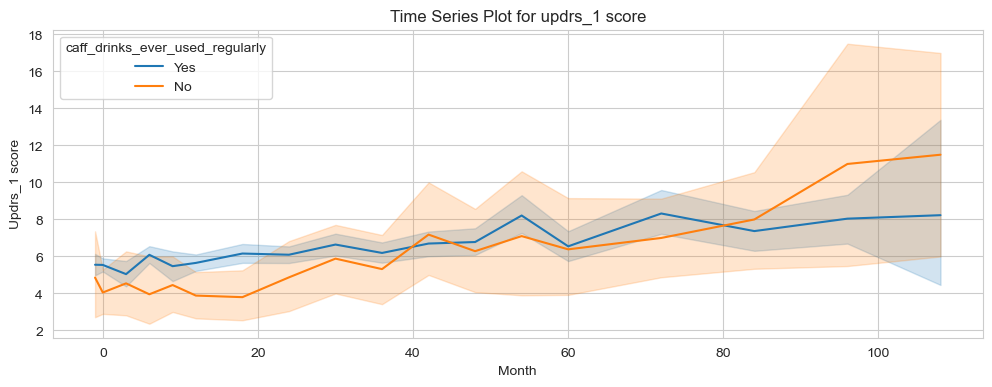

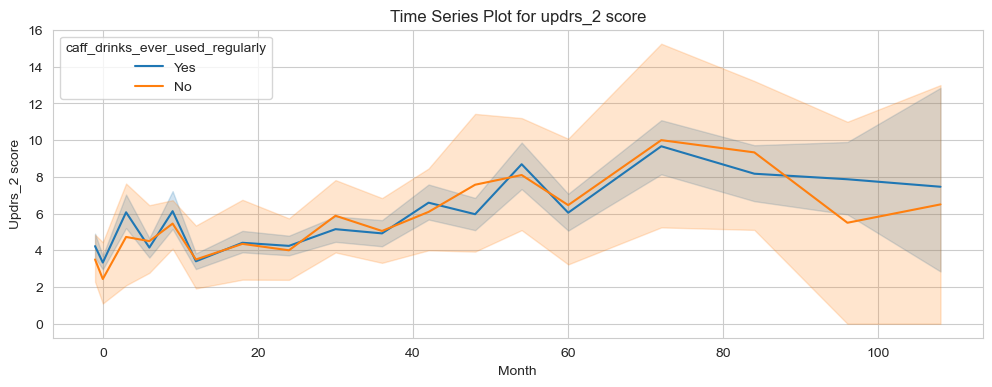

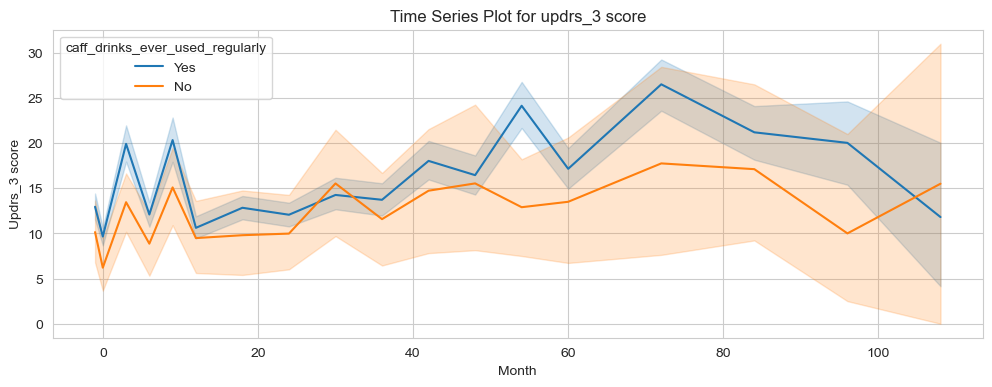

In [6]:
updrs_cols = ["updrs_1", "updrs_2", "updrs_3"]
caffeine_cols=["caff_drinks_current_use", "caff_drinks_ever_used_regularly"]


for caffeine_usage_type in caffeine_cols:
  for i,target in enumerate(updrs_cols):

    fig, ax_time = plt.subplots(1, 1, figsize=(12, 4))

    sns.lineplot(
      data=data,
      x="visit_month",
      y=target,
      hue=caffeine_usage_type,
      ax=ax_time
    )
    ax_time.set_title(f"Time Series Plot for updrs_{i+1} score")
    ax_time.set_xlabel("Month")
    ax_time.set_ylabel(f"Updrs_{i+1} score")


### Caffeine Usage vs. UPDRS Scores:

#### Observation: 
The line plots for both caff_drinks_current_use and caff_drinks_ever_used_regularly show that the UPDRS scores for users and non-users follow very similar upward trends over time. The lines are often overlapping, and there is no clear separation between the groups.


#### Analysis: 
This suggests that, based on this visual analysis, there is no strong association between caffeine consumption (both current and past) and the progression of Parkinson's symptoms as measured by the UPDRS scores in this dataset. Both groups appear to experience a similar rate of symptom progression over the 48-month period.

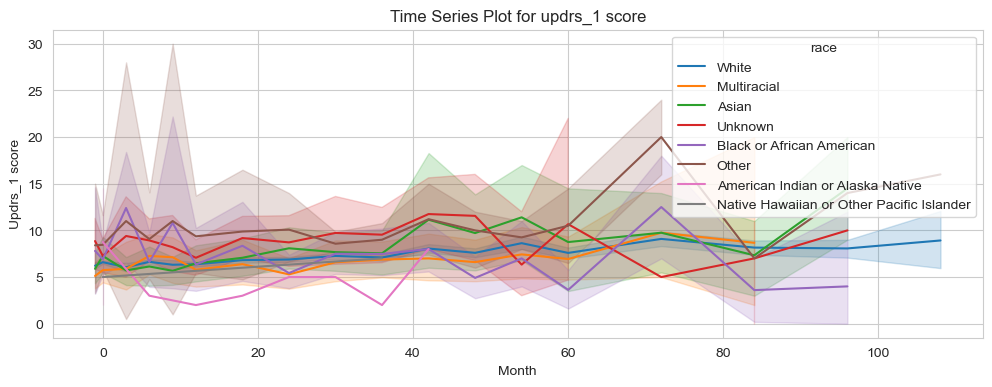

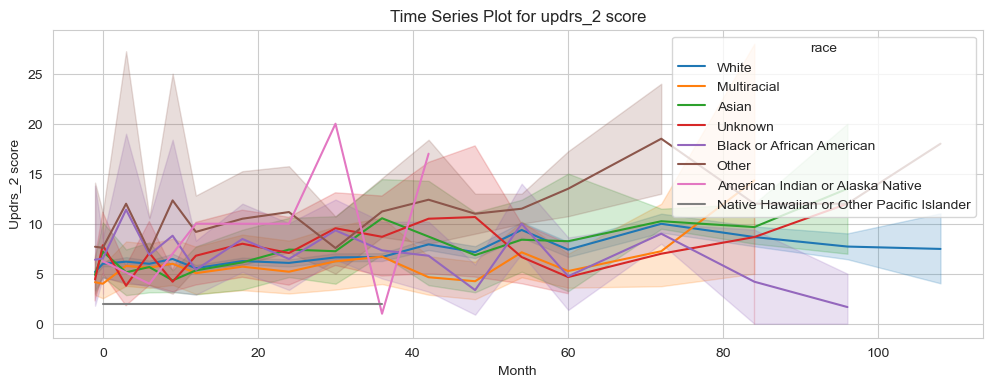

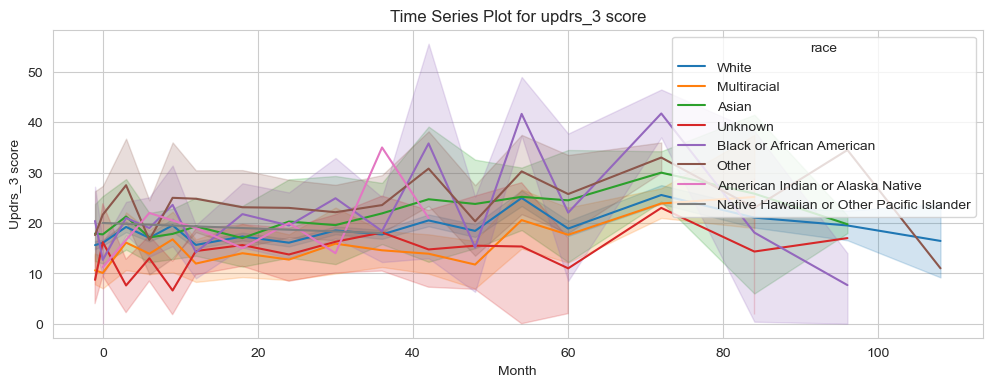

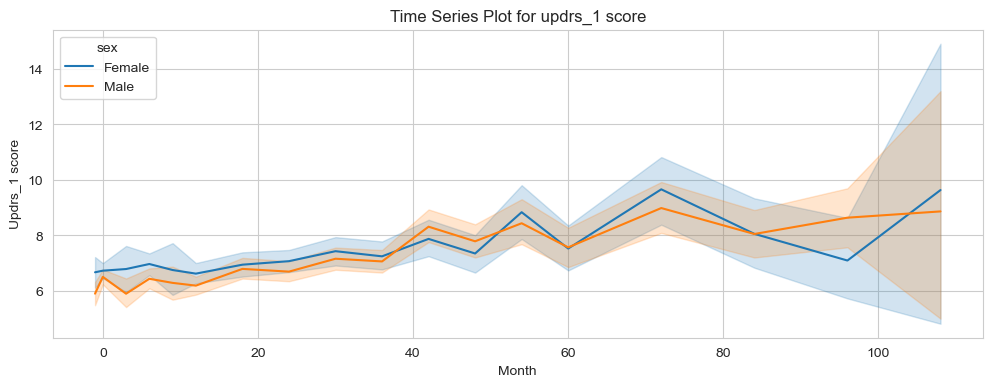

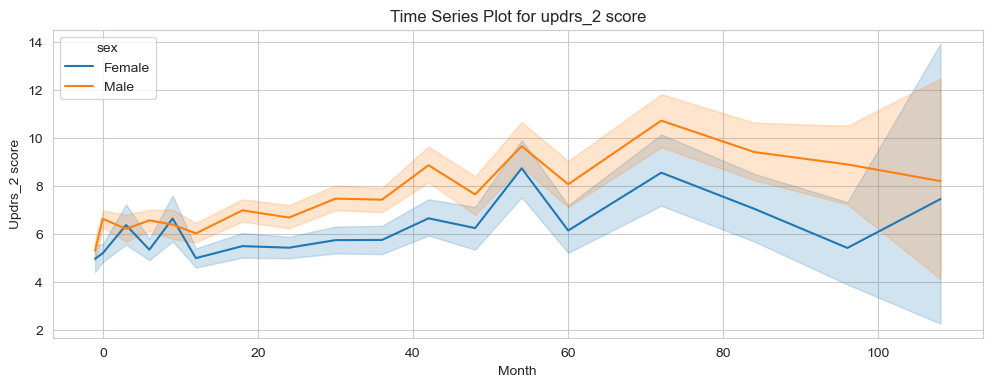

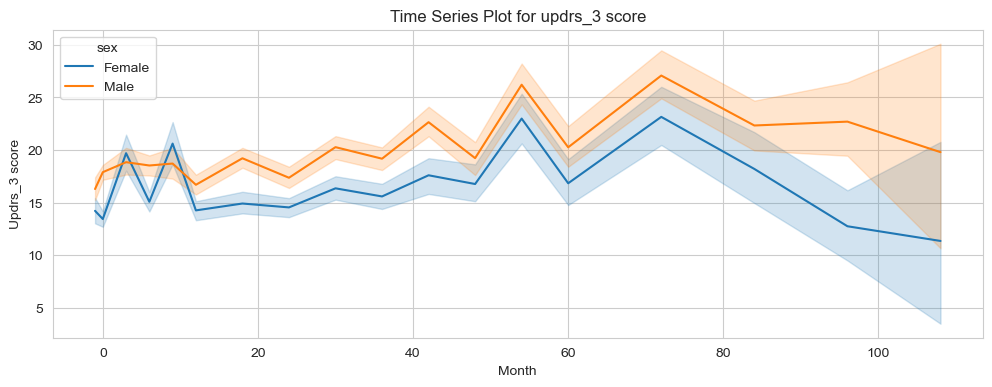

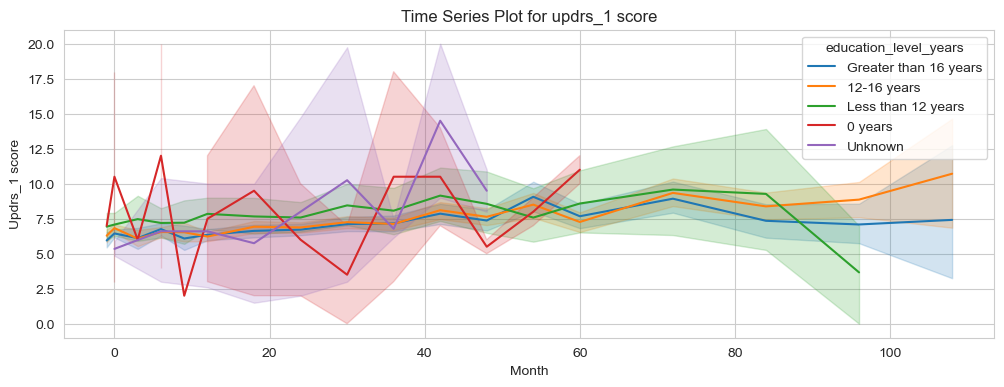

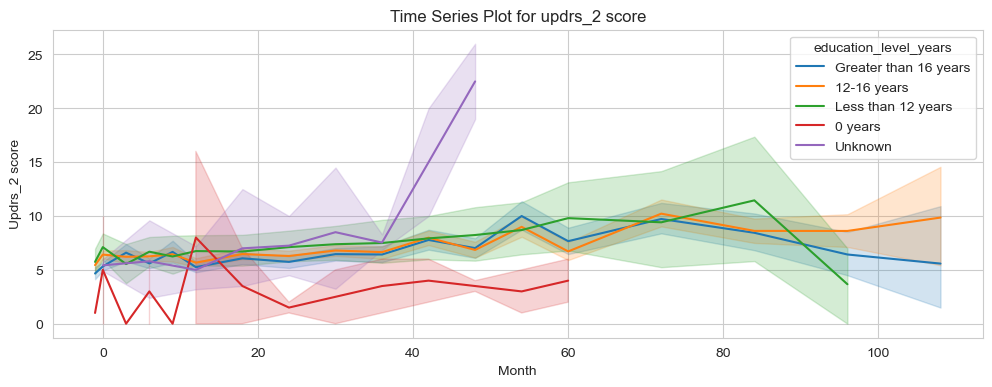

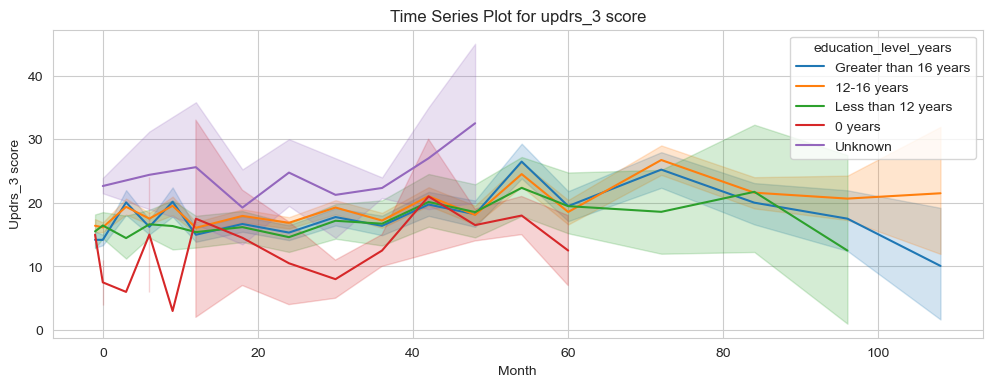

In [7]:
demographic_cols=["race","sex","education_level_years"]
for hue in demographic_cols:
  for i, target in enumerate(updrs_cols):

    fig, ax_time = plt.subplots(1, 1, figsize=(12, 4))


    sns.lineplot(
      data=data,
      x="visit_month",
      y=target,
      hue=hue,
      ax=ax_time
    )
    ax_time.set_title(f"Time Series Plot for updrs_{i+1} score")
    ax_time.set_xlabel("Month")
    ax_time.set_ylabel(f"Updrs_{i+1} score")

### Observation:
#### Gender: 
The lines for males and females are very close, indicating that gender does not appear to be a significant factor in the progression of UPDRS scores.

#### Race:
While there are some variations, the trend lines for different racial groups are largely similar, suggesting that race does not have a strong impact on the progression of symptoms in this cohort.

### Analysis:
These demographic factors do not seem to strongly influence the rate of symptom progression as measured by the UPDRS scores.


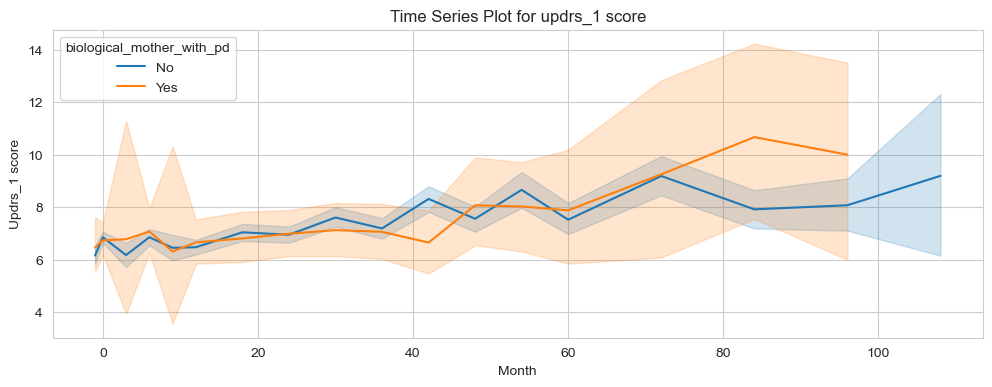

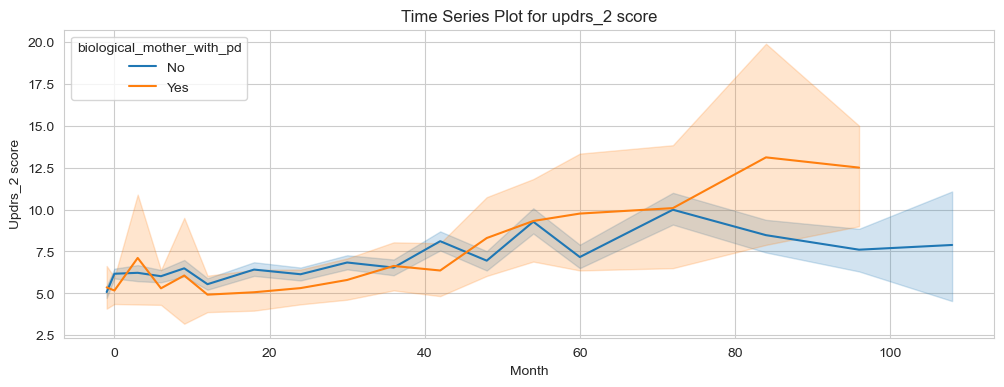

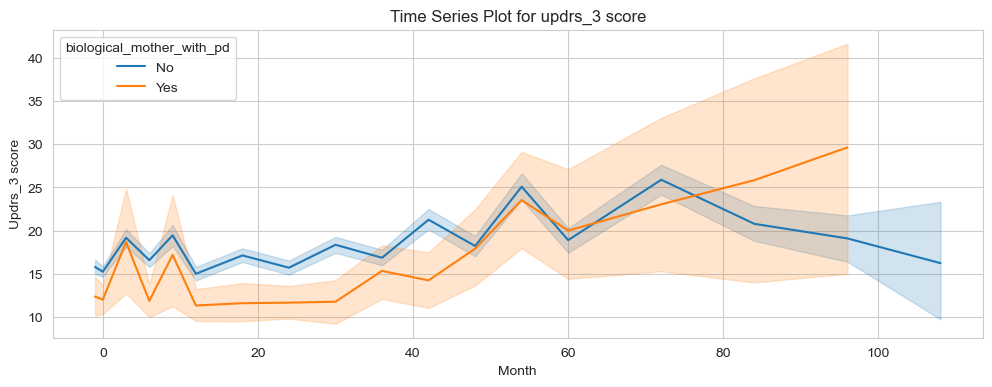

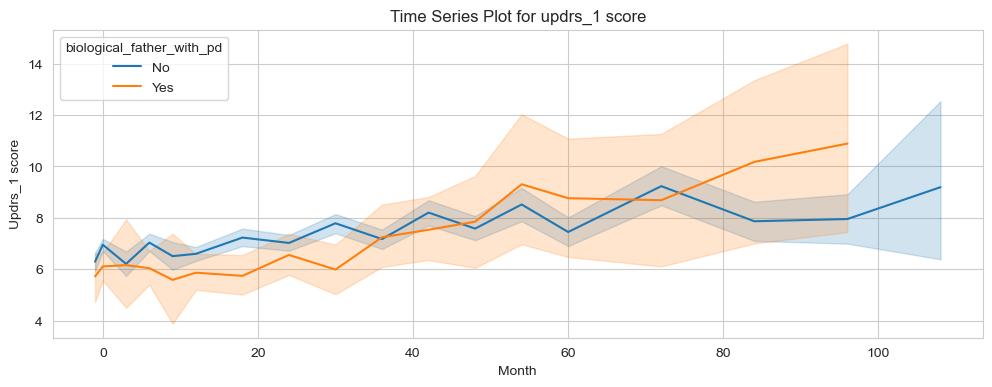

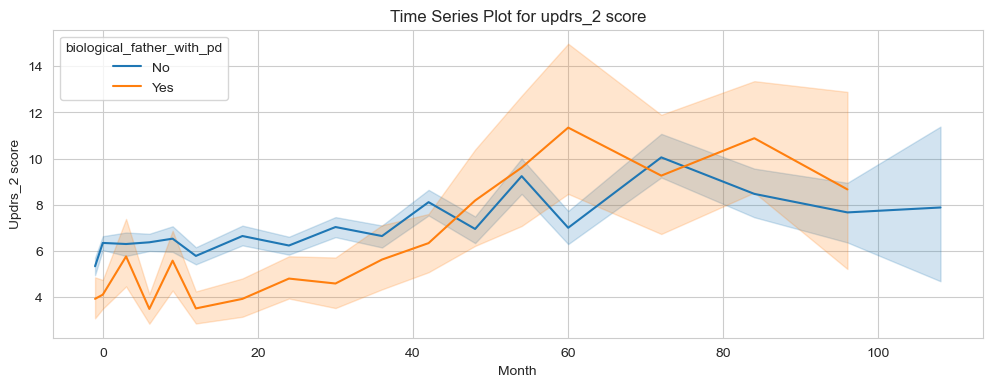

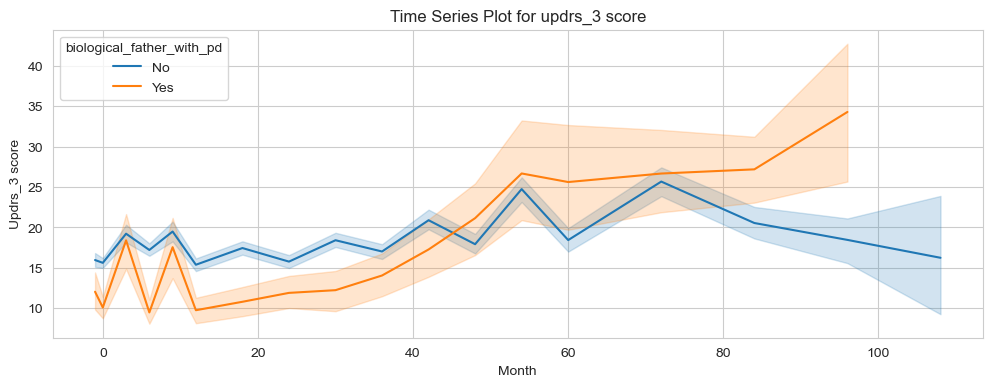

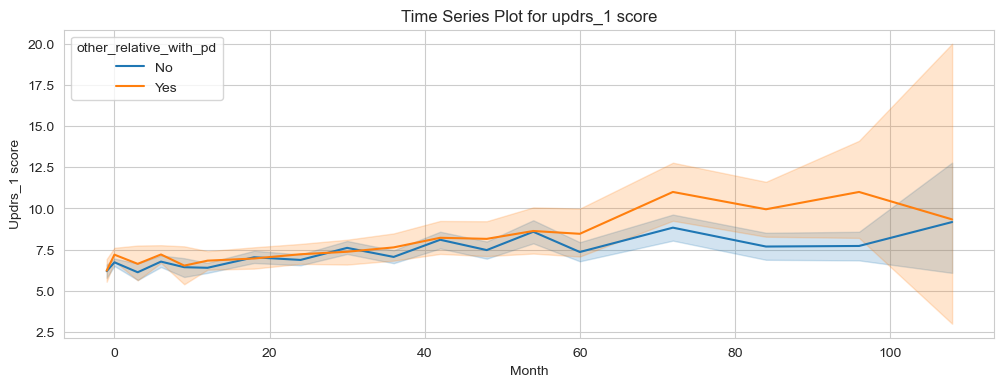

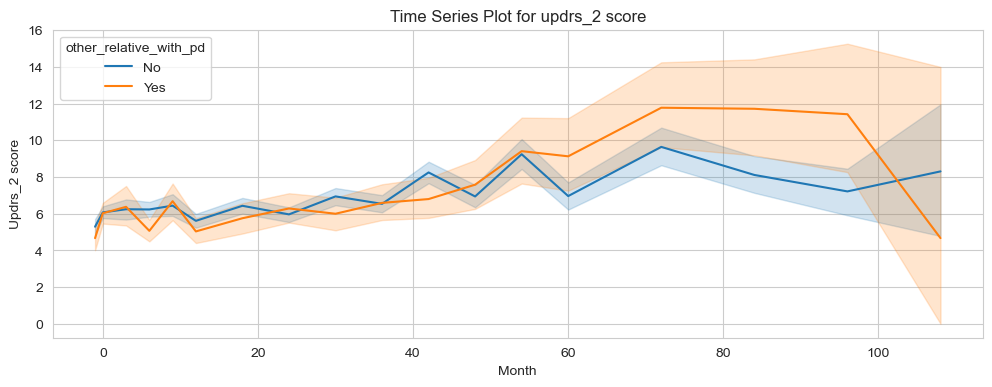

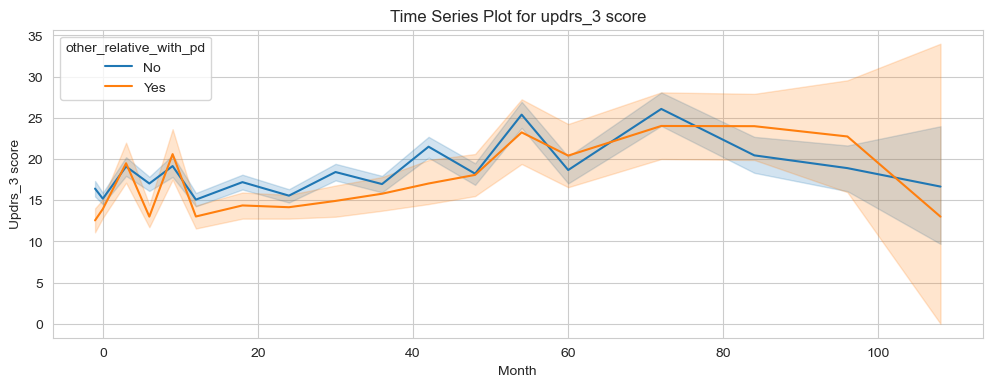

In [8]:
family_history_data=["biological_mother_with_pd","biological_father_with_pd","other_relative_with_pd"]
for hue in family_history_data:
  for i, target in enumerate(updrs_cols):
    fig, ax_time = plt.subplots(1, 1, figsize=(12, 4))

    sns.lineplot(
      data=data,
      x="visit_month",
      y=target,
      hue=hue,
      ax=ax_time
    )
    ax_time.set_title(f"Time Series Plot for updrs_{i+1} score")
    ax_time.set_xlabel("Month")
    ax_time.set_ylabel(f"Updrs_{i+1} score")

### Observation: 
The progression of UPDRS scores is also similar for individuals with and without a family history of Parkinson's disease.

### Analysis:
These family history do not seem to a strong factor of UPDRS score progression, either.

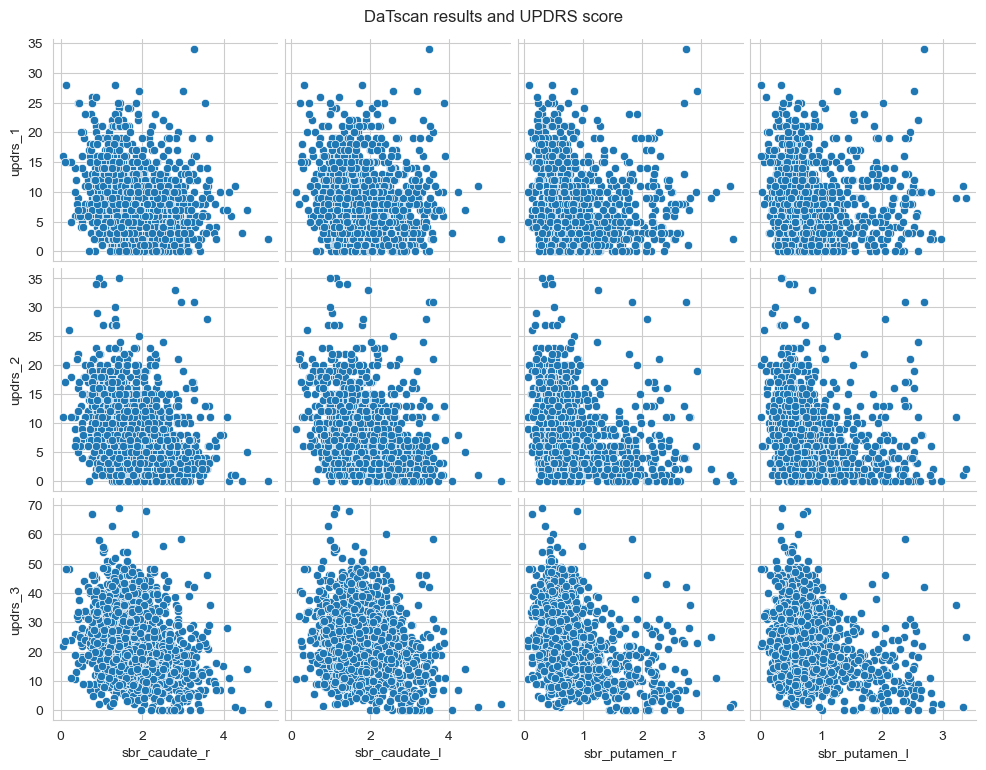

In [9]:
DaTscan_SBR_cols = ['sbr_caudate_r', 'sbr_caudate_l', 'sbr_putamen_r', 'sbr_putamen_l']
g = sns.pairplot(data=data, x_vars=DaTscan_SBR_cols, y_vars=updrs_cols)


g.figure.suptitle("DaTscan results and UPDRS score", y=1.02)  

plt.show()


### Observation:
As the DaTscan SBR values increase, the UPDRS scores tend to decrease. This is consistent with the biology domain knowledge. The relationship appears strongest for the putamen SBR values.

### Analysis:
There are negative correlations between the DaTscan SBR values and the UPDRS scores, particularly with updrs_2 and updrs_3.


In [10]:
DTI_cols = [i for i in data.columns if ("Eigenvalue" in i) or ("Fractional Anisotropy" in i)]
DTI_cols[:4]

['roi1_left_rostral_Eigenvalue1',
 'roi1_left_rostral_Eigenvalue2',
 'roi1_left_rostral_Eigenvalue3',
 'roi1_left_rostral_Fractional Anisotropy']

There is a large number of variables in `DTI_cols`, to improve the readability of the resulting graphs, we only take a look at the relation of the first four ("roi1_left_rostral_Eigenvalue1", "roi1_left_rostral_Eigenvalue2", "roi1_left_rostral_Eigenvalue3", "roi1_left_rostral_Fractional Anisotropy") with the updrs_scores. The rest have similar relations with the updrs scores.

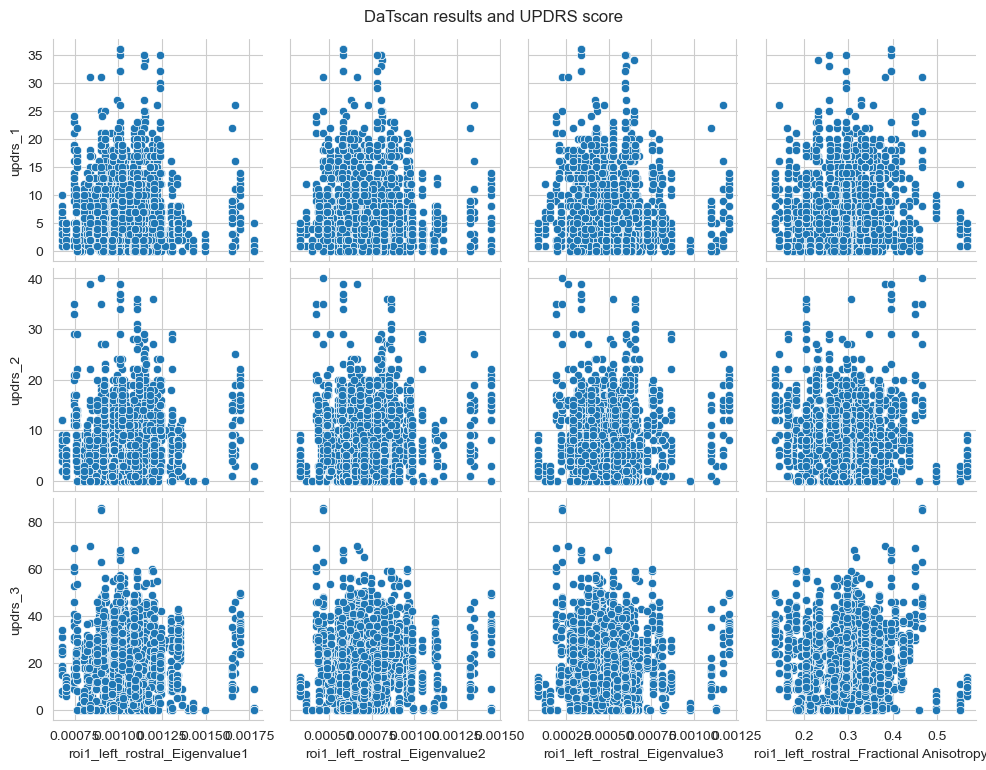

In [11]:
g = sns.pairplot(data=data, x_vars=DTI_cols[:4], y_vars=updrs_cols)


g.figure.suptitle("DaTscan results and UPDRS score", y=1.02)  

plt.show()

### Observations:

There are no strong, clear linear relationships between the selected DTI measures and the UPDRS scores. The scatter plots of DTI measures against UPDRS scores show diffuse clouds of points with no discernible upward or downward trend. 

### Analysis:
There isn't a simple linear correlation of DTI data with the severity of Parkinson's symptoms.

Convert categorical variables to numerical variables for correlation analysis.

In [12]:
num_clinical_feature_cols = ["age_at_baseline", "visit_month"]



dummies, skip, new_cols = get_dummies_and_sift(df = data, column_name = 'education_level_years')

num_clinical_feature_cols += new_cols

data = pd.concat([data, dummies], axis=1)



dummies, skip, new_cols = get_dummies_and_sift(df = data, column_name = 'sex')

num_clinical_feature_cols += new_cols

data = pd.concat([data, dummies], axis=1)



dummies, skip, new_cols = get_dummies_and_sift(df = data, column_name = 'race')

num_clinical_feature_cols += new_cols

data = pd.concat([data, dummies], axis=1)



map_cols = ["caff_drinks_current_use",
                "caff_drinks_ever_used_regularly", 
                "biological_mother_with_pd", 
                "biological_father_with_pd", 
                "other_relative_with_pd"]
for col in map_cols:
    if col in data.columns:
        data[col] = data[col].map({'Yes': 1, 'No': 0})
        data[col].astype("float64")

num_clinical_feature_cols += map_cols

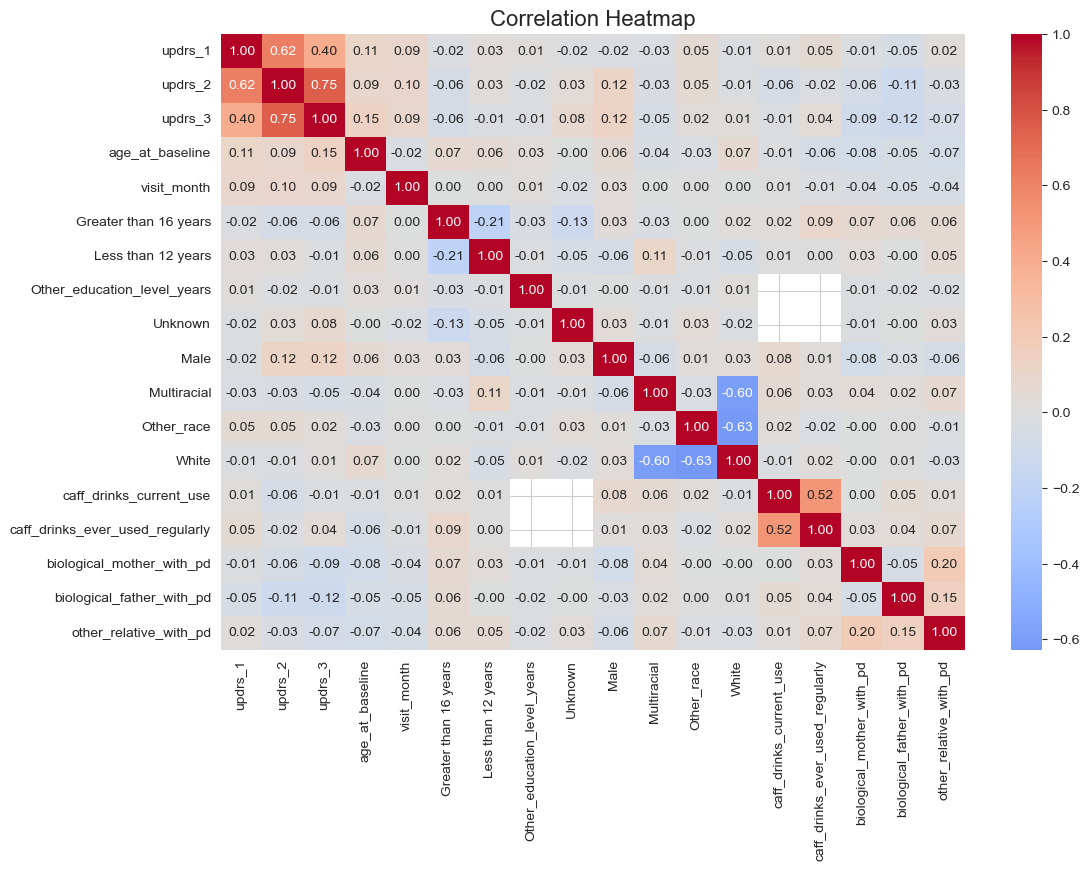

In [15]:
num_cols = updrs_cols + num_clinical_feature_cols 

corr_matrix = data[num_cols].corr(method="spearman")

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='coolwarm',     
    center=0,            
    fmt='.2f'
)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

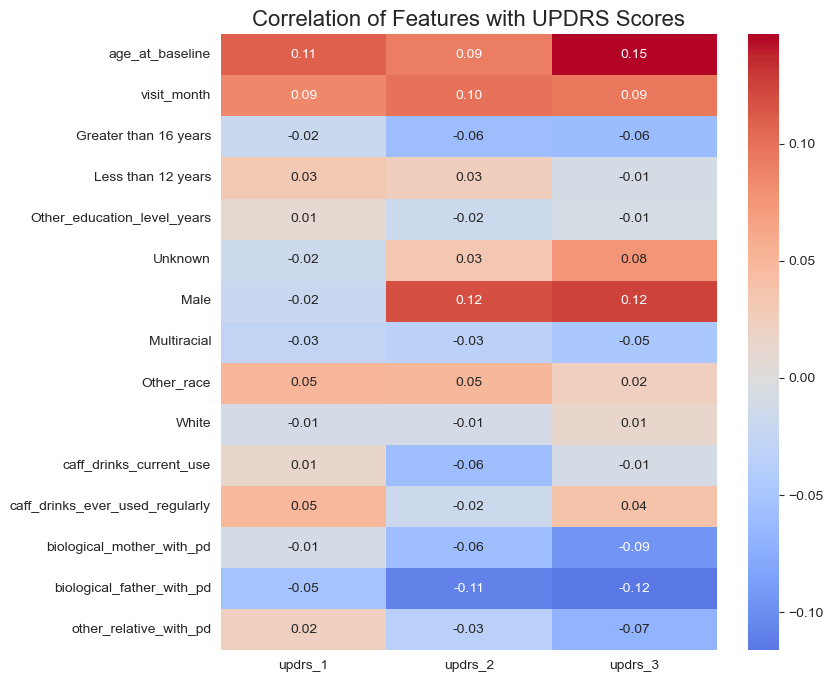

In [16]:
feature_to_updrs_corr = corr_matrix.loc[num_clinical_feature_cols, updrs_cols]


plt.figure(figsize=(8, 8))
sns.heatmap(
    feature_to_updrs_corr,
    annot=True,          
    cmap='coolwarm',     
    center=0,            
    fmt='.2f'
)
plt.title('Correlation of Features with UPDRS Scores', fontsize=16)
plt.show()

#### Observations:
Plenty of the correlation factors are below 0.1, absolute-value-wise. The most notable factors are `visit_month` and `age_at_baseline`. Also, UPDRS scores seem to be highly correlated with each other.

#### Analysis:
For the modelling process, we may start from modelling on the features `visit_month` and `age_at_baseline`. Besides, we may use multi-output regression to achieve a lower error than building separate models for each updrs scores here.

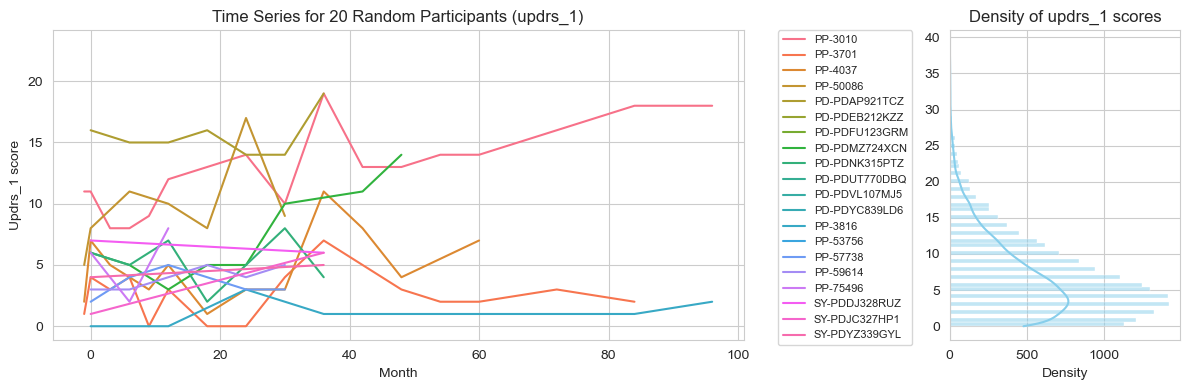

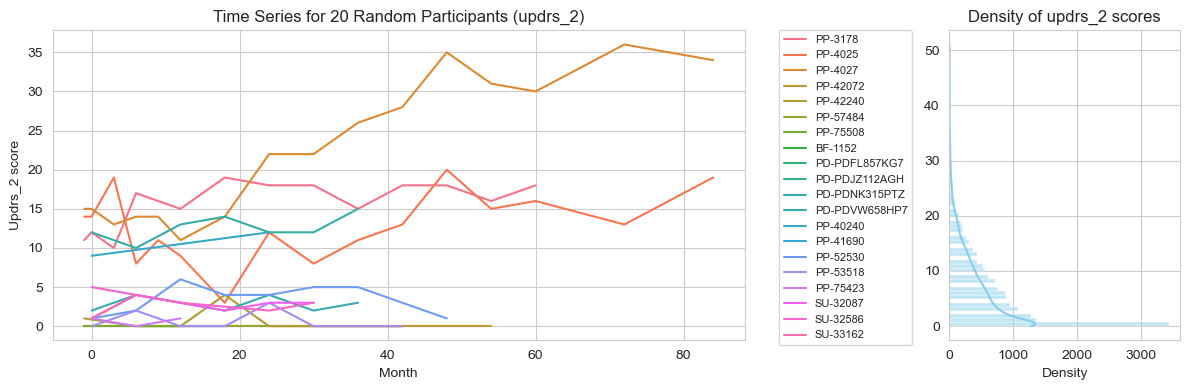

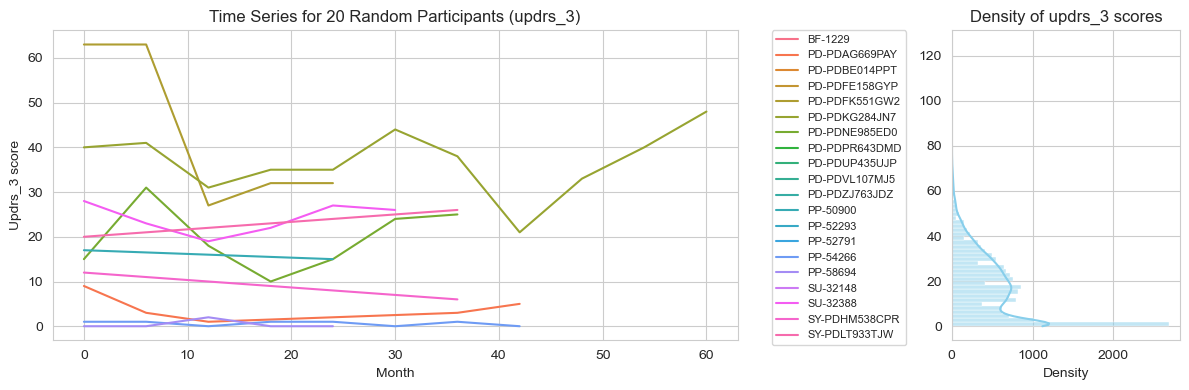

In [ ]:
# Plot the UPDRS progression for a random set of participants
for i in range(0,3):
    updrs_score=data[['participant_id','visit_month',f"updrs_{i+1}"]]

    updrs_score=updrs_score.dropna()

    all_participants = updrs_score['participant_id'].unique()

    sample_participants = random.sample(list(all_participants), 20)

    sample_df = updrs_score[updrs_score['participant_id'].isin(sample_participants)]

    fig, (ax_time, ax_density) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 1]})

    sns.lineplot(x='visit_month', y=f"updrs_{i+1}", data=sample_df, hue="participant_id", ax=ax_time)

    ax_time.set_title(f"Time Series for 20 Random Participants (updrs_{i+1})")
    
    ax_time.set_xlabel("Month")

    ax_time.set_ylabel(f"Updrs_{i+1} score")

    ax_time.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=8)


    sns.histplot(y=updrs_score[f"updrs_{i+1}"], ax=ax_density, fill=True, color='skyblue', kde=True)
    ax_density.set_title(f"Density of updrs_{i+1} scores")
    ax_density.set_xlabel("Density")
    ax_density.set_ylabel("")
    
    plt.tight_layout()
    plt.show()

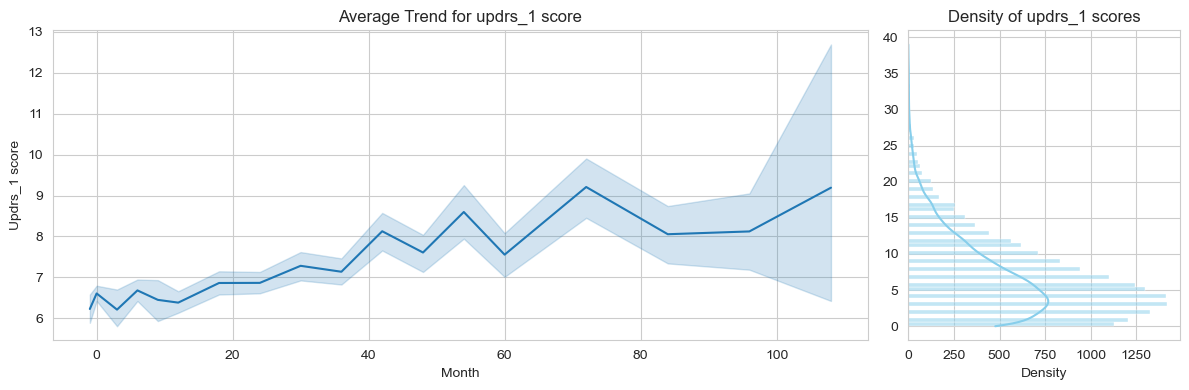

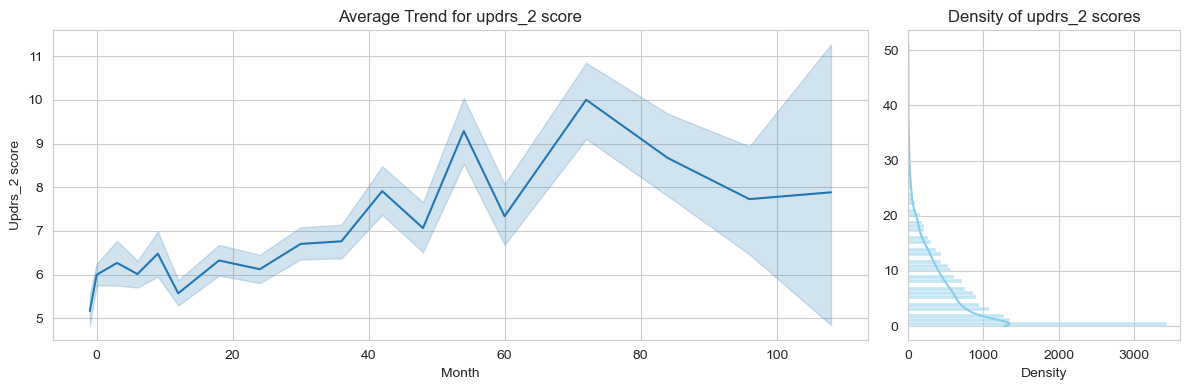

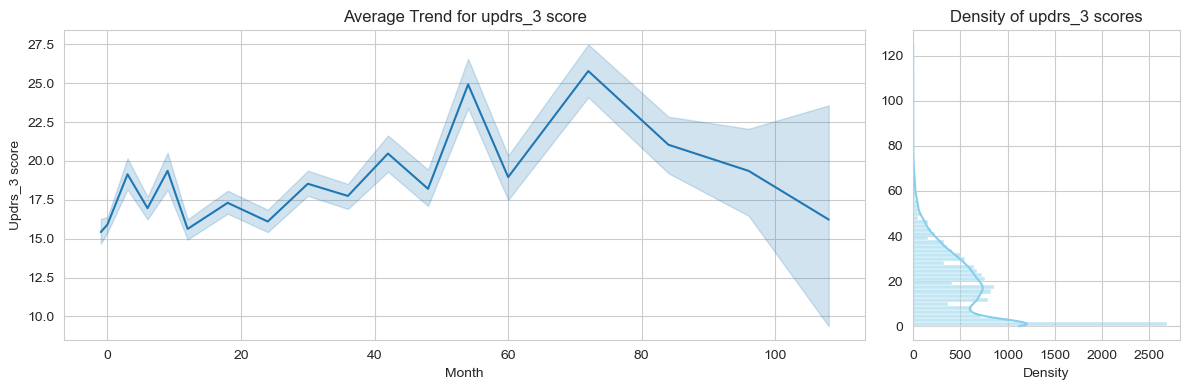

In [ ]:
# Plot the aggregated UPDRS progression
for i in range(0,3):
    updrs_score=data[['participant_id','visit_month',f"updrs_{i+1}"]]
    updrs_score=updrs_score.dropna()

    fig, (ax_time, ax_density) = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 1]})

    sns.lineplot(x='visit_month', y=f"updrs_{i+1}", data=updrs_score, ax=ax_time)
    
    ax_time.set_title(f"Average Trend for updrs_{i+1} score")
    ax_time.set_xlabel("Month")
    ax_time.set_ylabel(f"Updrs_{i+1} score")

    sns.histplot(y=updrs_score[f"updrs_{i+1}"], ax=ax_density, fill=True, color='skyblue', kde=True)
    ax_density.set_title(f"Density of updrs_{i+1} scores")
    ax_density.set_xlabel("Density")
    ax_density.set_ylabel("")
    
    plt.tight_layout()
    plt.show()

### Observation:

1. On average, Parkinson's symptoms, particularly motor scores (updrs_2 and updrs_3), worsen over time, and displays a non-linear nature.

2. Moreever, the aggregated UPDRS progression plots indicates significant patient heterogeneity. The rate and pattern of progression are highly variable from one person to the next, as is also confirmed by the plots from a random sample of participants.

### Analysis:

&emsp;&emsp;Applying linear models will be difficult.

## Final Remark:

#### We will start from tree models for the following reasons:  

1. Tree models handles non-linearity well:

    We see from the plots of updrs scores against time that the progression is nonlinear, but is still continuous.


2. Heterogeneity and uneven UPDRS scores distribution: 

    Tree models work by partitioning the data, thereby adapt to the heterogeneity and uneven distributions well. However, for &linear models, we will need a much more complicated data preprocessing.

3. Feature Importance: 

    We have a lot of features including the proteomic data. The feature importance function of tree based models will allow us to select feature in a efficient and precise way. Also, there is over 1300 proteomic feature with only 16255 observations. If we apply linear models, we are exposed to a higher risk of curse of dimensionality. However, tree models, such as random forest models, are more immune to that as each decision tree in the forest is built using only a random subset of features.

4. Native Multi-Output Support: 

    Tree Models also support Multi-Output regression in a convenient way.